# Лабораторна робота №5
## Завдання 1

- Завантажити вдудований датасет Ірис. 
- Методом ліктя і силуетів визначити оптимальну кількість кластерів.
- Візуалізувати кластери.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [2]:
iris_data = datasets.load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


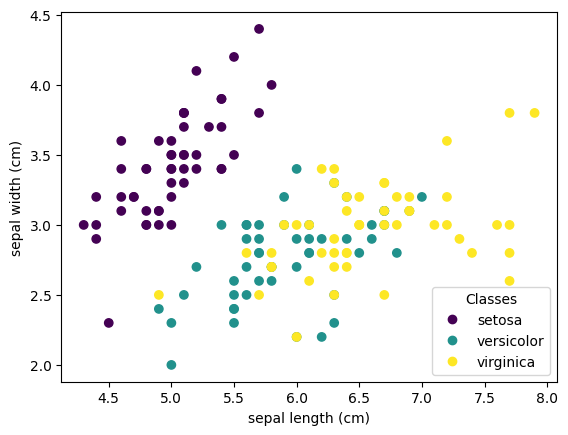

In [3]:
_, ax = plt.subplots()
scatter = ax.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=iris_data.target)
ax.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris_data.target_names, loc="lower right", title="Classes"
)

In [4]:
# Check for missin and duplicate values
print(X.isnull().sum())
print(X.duplicated().sum())

# Remove duplicates
X = X.drop_duplicates()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
1


In [5]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


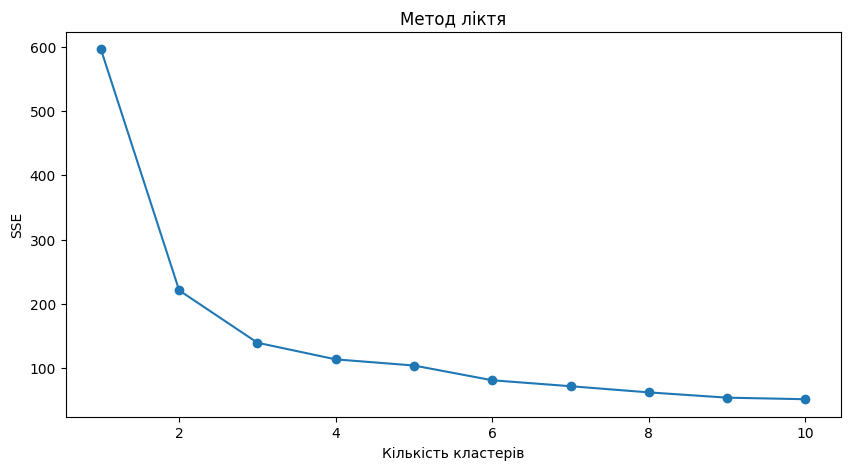

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод ліктя
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Метод ліктя')
plt.show()

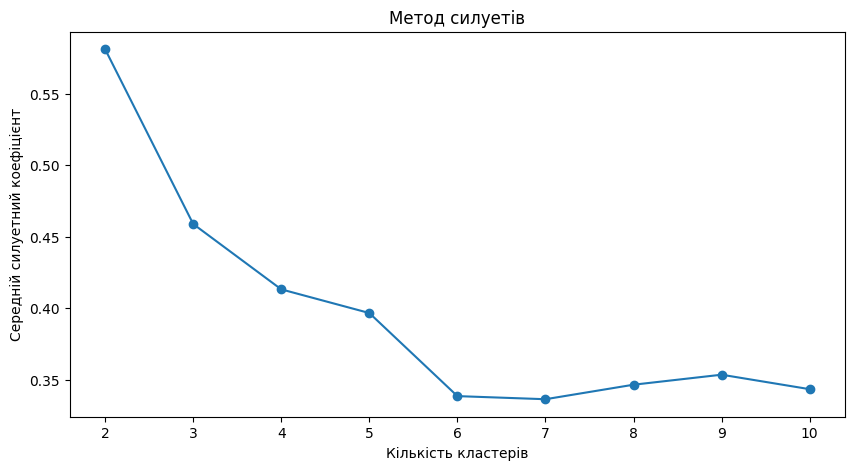

In [8]:
# Метод силуетів
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній силуетний коефіцієнт')
plt.title('Метод силуетів')
plt.show()

Обидва методи говорять, що оптимальна кількість це 2 кластери.

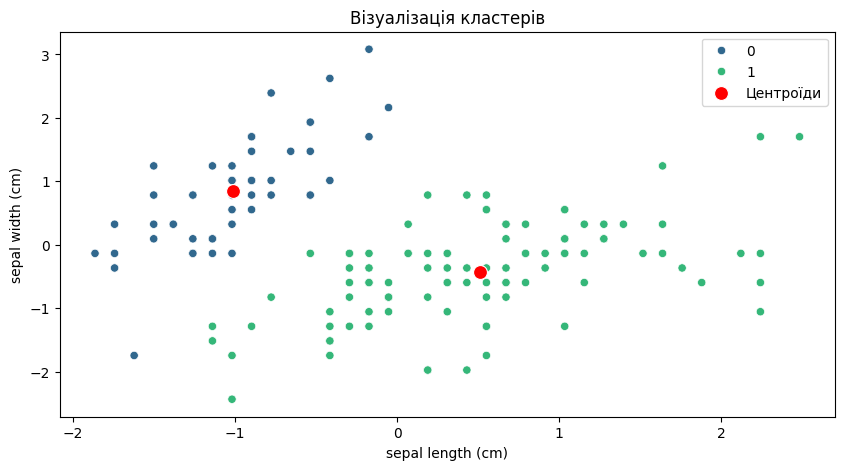

In [15]:
# Виконання кластеризації з оптимальною кількістю кластерів
optimal_clusters = 2 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X_scaled)
labels = kmeans.labels_

# Візуалізація кластерів
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', marker='o', legend='full')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='o', s=100, label='Центроїди')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title('Візуалізація кластерів')
plt.show()